## 2-5. 프로젝트: SentencePiece 사용하기

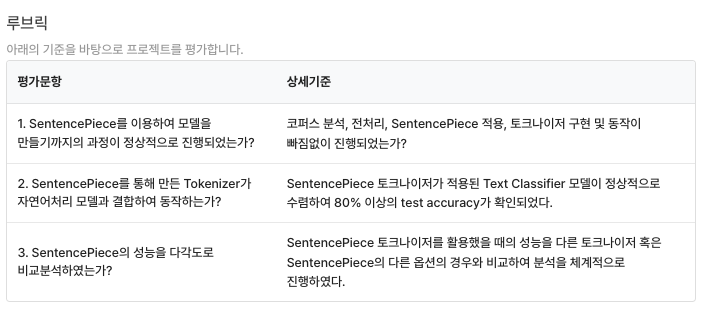

## Step 0 : 데이터 전처리(preprocessing)

In [1]:
from konlpy.tag import Mecab #mecab을 이용해 형태소 토큰화

In [2]:
mecab = Mecab()

In [3]:
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [4]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [5]:
#코퍼스 불러오기, https://github.com/jungyeul/korean-parallel-corpora 이 깃헙에서 한영 파일 다운로드

import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file,'r') as f :
    raw = f.read().splitlines()
    
print('Data Size : ',len(raw))

print('Example:')
for sen in raw[0:100][::20]: print('>>',sen)

Data Size :  94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [6]:
# 데이터 확인하기, 최대 문장 길이, 최소 문장 길이, 평균 길이
min_len = 999
max_len = 0
sum_len = 0

for sen in raw :
    length = len(sen)
    if min_len > length : min_len = length
    if max_len < length : max_len = length
    sum_len += length
    
print(min_len)
print(max_len)
print(sum_len//len(raw))

1
377
60


In [7]:
#최대 문장 길이 만큼 0으로 채워진 행렬 만들기 -> 문장긴장에 따른 데이터 분포 확인
sentence_length = np.zeros((max_len), dtype=int)

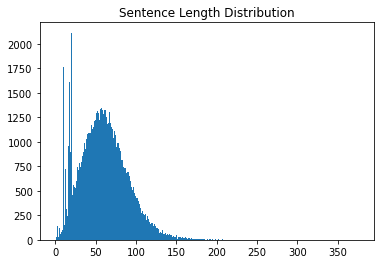

'\n문장 길이가 60인 데이터가 다수인 것을 확인, 아웃라이어들이 몇게 보이는 것 같습니다.\n'

In [8]:
#문장 길이별로 행렬 값 채우기
for sen in raw :
    sentence_length[len(sen)-1] += 1

#분포 그려보기
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

'''
문장 길이가 60인 데이터가 다수인 것을 확인, 아웃라이어들이 몇게 보이는 것 같습니다.
'''

In [9]:
#문장 길이 해당하는 데이터 인덱스 불러오는 함수

def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

#문장 길이 1인 인덱스 확인
check_sentence_with_length(raw, 1)

’


In [10]:
#혹시 중복이 있는 지 확인, 어느 시점에 있는 데이터 너무 많이 포화됨

for idx, _sum in enumerate(sentence_length):
    if _sum > 1500 :
        print('outlier index :',idx+1)

outlier index : 11
outlier index : 19
outlier index : 21


In [11]:
#중복이 쾌 많은 것을 확인
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


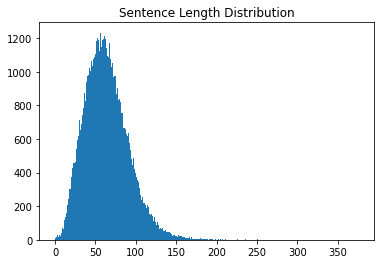

In [12]:
# 전처리를 조금 더 해야할 것 같네요. 중복 삭제를 해야겠습니다.

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

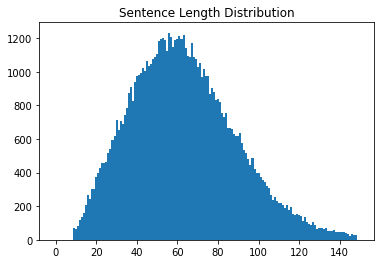

In [13]:
#또한 문장 길이가 너무 길어지면 연산량도 많아지고, 문장이 너무 작아도 모델링에 편향성을 더할 수 있기 때문에 빼도록 하죠.

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [14]:
#tokenizing 함수를 keras를 이용해 만들어보겠습니다. 

def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [15]:
# 토큰화 비교를 위해 공백 기반, mecab 두개 다 테스트 해보겠습니다. 

# 정제된 데이터 filtered_corpus를 공백 기반으로 토큰화
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())
    
print(split_corpus[:1]) #공백 기준 

[['사실', '피츠버그', '대학의', '영은', '그러한', '회의론(懷疑論)을', '이해한다.']]


In [16]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word)) #Split Vocab Size: 237435, 너무 크네요....

Split Vocab Size: 237435


In [17]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break #단어 사전으로 필요 없는 단어들, 부호들도 들어가는 것을 확인 할 수 있네요... 한국어는 공백기준으로 하면 절대 안되겠네요...

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [18]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보겠습니다.
def mecab_split(sentence):
    # 코드를 작성하세요
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [19]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word)) #52279 mecab을 이용하니 확실히 줄었습니다.

MeCab Vocab Size: 52279


In [20]:
# 정수에서 텍스트로도 변환이 필요하겠죠? 디코더 함수를 작성하겠습니다.

def decode_idx(tensor, tokenizer) :
    decoded_sentence = []
    for idx in tensor :
        if not idx ==0 :
            decoded_sentence.append(tokenizer.index_word[idx])
    return ' '.join(decoded_sentence)

In [21]:
decode_idx(mecab_tensor[0], mecab_tokenizer)

'사실 피츠버그 대학 의 영 은 그러 한 회의 론 ( 懷疑 論 ) 을 이해 한다 .'

In [22]:
# sequences_to_texts를 이용해도 같은 결과를 얻을 수 있습니다. 

def decode_seq(tensor, tokenizer) :
    return tokenizer.sequences_to_texts(tensor)

In [23]:
decode_seq([mecab_tensor[0,:]], mecab_tokenizer)

['사실 피츠버그 대학 의 영 은 그러 한 회의 론 ( 懷疑 論 ) 을 이해 한다 .']

### Step 1. SentencePiece 설치하기

In [24]:
# setencepiece에서 제공하는 토큰화를 이용해보겠습니다. 

import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.21.4
3.4.3
0.5.2


In [25]:
# ! pip install sentencepiece

### Step 2. SentencePiece 모델 학습

In [26]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

In [27]:
vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

# 코퍼스를 입력으로 주어 sentencepiece를 학습시키도록 하겠습니다, mecab이랑 상이하게 sentencepiece는 subword 기준으로 토큰화합니다.
# 그리고 인자로 여러개를 주어 다양한 방식으로 커스터마이징도 가능합니다. 아래 링크 참고
# https://github.com/google/sentencepiece/blob/master/doc/options.md

spm.SentencePieceTrainer.Train( 
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Jan 11 08:40 korean_spm.model
-rw-r--r-- 1 root root 146213 Jan 11 08:40 korean_spm.vocab


In [28]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### Step 3. Tokenizer 함수 작성

In [29]:
#위와 동일하게 sentence piece로 토큰화된 list를 keras tokenizerd에 적용
s_corpus =[]

for sen in filtered_corpus :
    s_corpus.append(s.SampleEncodeAsPieces(sen,1,0.0))
    
print(s_corpus[0])

['▁사실', '▁피츠버그', '▁대학', '의', '▁영', '은', '▁그러', '한', '▁회의', '론', '(', '懷疑論', ')', '을', '▁이해', '한다', '.']


In [30]:
s_tensor, s_tokenizer = tokenize(s_corpus)

In [31]:
decode_seq([s_tensor[0,:]], s_tokenizer)

['▁사실 ▁피츠버그 ▁대학 의 ▁영 은 ▁그러 한 ▁회의 론 ( 懷疑論 ) 을 ▁이해 한다 .']

In [32]:
# 다른 방식으로도 sentencepiece keras tokenizer 사용; 위에 함수에서는 학습을 사실상 불필요하게 다시한번 하고 있음, fitting 이미 되어 있음

def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f: # 학습으로 만들어진 vocab을 참고해서 dictionary 생성
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [33]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


In [34]:
len(s_tokenizer.index_word) #length가 다르게 인식이됩니다. 아마 문장 _기호가 들어간 단어들을 별도로 보기 때문인 것 같습니다.

8658

In [35]:
len(index_word)

8000

### Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

네이버 영화리뷰 감정 분석 태스크가 있습니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용하게 되는데요.

만약 이 문제에서 tokenizer를 SentencePiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? KoNLPy에 있는 Mecab, kkma, Okt 등과 비교해보세요. (여러분들은 fasttext(https://wikidocs.net/22883)로 사전훈련된 Word Vector를 사용할 수 있지만 sentencepiece와 KoNLPy에 있는 형태소로 모델을 만드는 것보다 코드 수정이 많이 일어납니다. 기본적인 태스크를 끝나고(sentencepiece - KoNLPy 형태소 비교) 도전하시는걸 추천합니다.)

네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
학습된 모델로 sp_tokenize() 메소드 구현하기
구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

### 4.1 데이터 불러오기

In [36]:
#data download
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
# !wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [37]:
#데이터 불러오기
import pandas as pd
path_c = 'ratings_train.txt.1'
path_t = 'ratings_test.txt.1'
train = pd.read_table(path_c)
test = pd.read_table(path_t)

### 4.2 데이터 전처리

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [40]:
#결측치 제거
for i in [train,test]:
    i.dropna(inplace=True)

In [41]:
#중복 제거
for dataset in [train, test] :
    dataset.drop_duplicates(subset='document', inplace=True)

In [42]:
# clean dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146182 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146182 non-null  int64 
 1   document  146182 non-null  object
 2   label     146182 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


In [43]:
#문장 시작점 추가

for dataset in [train, test] :
    dataset.document = dataset.document.apply(lambda x : '<BOS> ' + x)

In [44]:
#preparation for tokenizing
corpus_tr = train.document.values
corpus_ts = test.document.values

label_tr = train.label.values
label_ts = test.label.values

min len : 7
max len : 152
average len : 41


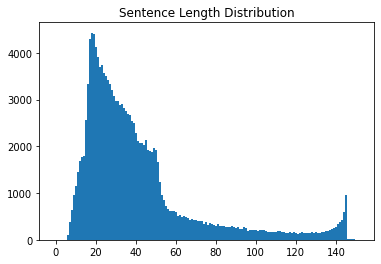

In [45]:
#문장 길이 분포 알아보기 Training

import matplotlib.pyplot as plt

min_len = 999
max_len = 0
sum_len = 0

for sen in corpus_tr :
    length = len(sen)
    if length < min_len : min_len = length
    if length > max_len : max_len = length
    sum_len += length

print('min len :',min_len)
print('max len :',max_len)
print('average len :',sum_len // len(corpus_tr))

sentence_length = np.zeros((max_len), dtype=int)

for sen in corpus_tr:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show() #

min len : 7
max len : 150
average len : 41


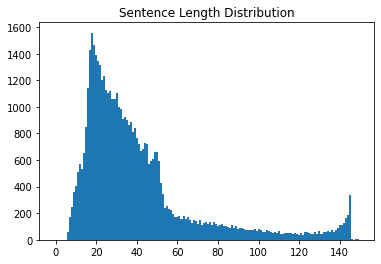

In [46]:
#문장 길이 분포 알아보기 Test

min_len = 999
max_len = 0
sum_len = 0

for sen in corpus_ts :
    length = len(sen)
    if length < min_len : min_len = length
    if length > max_len : max_len = length
    sum_len += length

print('min len :',min_len)
print('max len :',max_len)
print('average len :',sum_len // len(corpus_ts))

sentence_length = np.zeros((max_len), dtype=int)

for sen in corpus_ts:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [47]:
def flag_idx(max_len, min_len, corpus) :
    remove_idx = []
    
    for i,sen in enumerate(corpus) :
        length = len(sen)
        if (length > max_len) or (length < min_len) : 
            remove_idx.append(i)
    return remove_idx

In [48]:
#지장한 문장 길이 범위 안에서만 분석하도록 하겠습니다. 
max_len = 60
min_len = 5

idx_tr = flag_idx(max_len, min_len, corpus_tr)
idx_ts = flag_idx(max_len, min_len, corpus_ts)

print('# of data removing in training set :', len(idx_tr))
print('# of data removing in test set :', len(idx_ts))

# of data removing in training set : 23662
# of data removing in test set : 7955


In [49]:
corpus_tr = train.document.values
corpus_ts = test.document.values

label_tr = train.label.values
label_ts = test.label.values

In [50]:
mask_tr = np.ones(corpus_tr.shape,bool)
mask_ts = np.ones(corpus_ts.shape,bool)
mask_tr[idx_tr] = False
mask_ts[idx_ts] = False

In [51]:
corpus_tr_clean = corpus_tr[mask_tr]
corpus_ts_clean = corpus_ts[mask_ts]
label_tr_clean = label_tr[mask_tr]
label_ts_clean = label_ts[mask_ts]

In [52]:
idx = 100
print(corpus_ts_clean[idx])
print(label_ts_clean[idx])
print(corpus_tr_clean[idx])
print(label_ts_clean[idx])

<BOS> 이뿌고 따뜻한 애니였어요
1
<BOS> 시청률 기준이 되는 패널가구들 머하는거지 명작드라마 다 망치네 ㅡㅡ 내가 다 서운하다...
1


min len : 7
max len : 60
average len : 31


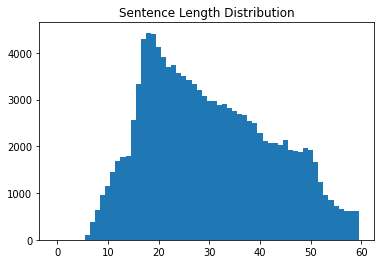

In [53]:
#문장 길이 분포 알아보기 Test

min_len = 999
max_len = 0
sum_len = 0

for sen in corpus_tr_clean :
    length = len(sen)
    if length < min_len : min_len = length
    if length > max_len : max_len = length
    sum_len += length

print('min len :',min_len)
print('max len :',max_len)
print('average len :',sum_len // len(corpus_tr_clean))

sentence_length = np.zeros((max_len), dtype=int)

for sen in corpus_tr_clean:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 4.3 tokenizing

In [56]:
def tokenize_pre(corpus_tr, corpus_ts, f, max_len) :
    
    train_corpus = []
    test_corpus = []

    for sen in corpus_tr :
        train_corpus.append(f(sen))

    for sen in corpus_ts :
        test_corpus.append(f(sen))
    
    corpus = np.concatenate((train_corpus, test_corpus), axis=0)
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor_tr = tokenizer.texts_to_sequences(train_corpus)
    tensor_ts = tokenizer.texts_to_sequences(test_corpus)
    
    tensor_tr = tf.keras.preprocessing.sequence.pad_sequences(tensor_tr, maxlen=max_len, padding='pre')
    tensor_ts = tf.keras.preprocessing.sequence.pad_sequences(tensor_ts, maxlen=max_len, padding='pre')

    print("Vocab Size:", len(tokenizer.index_word))
    
    return tensor_tr, tensor_ts, tokenizer

In [57]:
#공백

def split_function(sentence) :
    return sentence.split()

s_tensor_tr, s_tensor_ts, s_tokenizer = tokenize_pre(corpus_tr_clean, corpus_ts_clean, split_function, max_len)

Vocab Size: 287964


In [58]:
decode_seq([s_tensor_tr[0,:]], s_tokenizer)

['<bos> 아 더빙.. 진짜 짜증나네요 목소리']

In [59]:
#mecab
mecab_tensor_tr, mecab_tensor_ts, mecab_tokenizer = tokenize_pre(corpus_tr_clean, corpus_ts_clean, mecab.morphs, max_len)

Vocab Size: 47496


In [60]:
decode_seq([mecab_tensor_tr[0,:]], mecab_tokenizer)

['< bos > 아 더 빙 . . 진짜 짜증 나 네요 목소리']

In [61]:
concat_corpus = np.concatenate((corpus_tr_clean, corpus_ts_clean),axis=0)
concat_corpus.shape

(163722,)

In [62]:
#sentence piece
sent_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/sent.train.ko.temp'

vocab_size = 8000

with open(sent_file, 'w') as f:
    for row in concat_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

# 코퍼스를 입력으로 주어 sentencepiece를 학습시키도록 하겠습니다, mecab이랑 상이하게 sentencepiece는 subword 기준으로 토큰화합니다.
# 그리고 인자로 여러개를 주어 다양한 방식으로 커스터마이징도 가능합니다. 아래 링크 참고
# https://github.com/google/sentencepiece/blob/master/doc/options.md

spm.SentencePieceTrainer.Train( 
    '--input={} --model_prefix=sent_spm --vocab_size={}'.format(sent_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l sent_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/sent.train.ko.temp --model_prefix=sent_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/sent.train.ko.temp
  input_format: 
  model_prefix: sent_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_

-rw-r--r-- 1 root root 375597 Jan 11 08:42 sent_spm.model
-rw-r--r-- 1 root root 144967 Jan 11 08:42 sent_spm.vocab


In [63]:
# 다른 방식으로도 sentencepiece keras tokenizer 사용; 위에 함수에서는 학습을 사실상 불필요하게 다시한번 하고 있음, fitting 이미 되어 있음

def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f: # 학습으로 만들어진 vocab을 참고해서 dictionary 생성
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [64]:
def sp_tokenize_pre(s, corpus_tr, corpus_ts):

    tensor_tr = []
    tensor_ts = []

    for sen in corpus_tr:
        tensor_tr.append(s.EncodeAsIds(sen))
    
    for sen in corpus_ts:
        tensor_ts.append(s.EncodeAsIds(sen))
     

    with open("./korean_spm.vocab", 'r') as f: # 학습으로 만들어진 vocab을 참고해서 dictionary 생성
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor_tr = tf.keras.preprocessing.sequence.pad_sequences(tensor_tr, maxlen= max_len, padding='post')
    tensor_ts = tf.keras.preprocessing.sequence.pad_sequences(tensor_ts, maxlen= max_len, padding='post')
    
    return tensor_tr, tensor_ts, word_index, index_word

In [65]:
s = spm.SentencePieceProcessor()
s.Load('sent_spm.model')

True

In [66]:
sp_tensor_tr, sp_tensor_ts, sp_word_index, sp_index_word = sp_tokenize_pre(s, corpus_tr_clean, corpus_ts_clean)

In [67]:
sp_tensor_tr[0,:]

array([   5,    3,    6,    4,   53,  890,    9,   33, 1942,   67, 1955,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [68]:
print(s.DecodeIds(sp_tensor_tr[0,:11].tolist()))

<BOS> 아 더빙.. 진짜 짜증나네요 목소리


In [69]:
sp_tensor_tr.shape

(122520, 60)

### 4.4 modeling

In [101]:
import numpy as np
import tensorflow as tf
import os

In [102]:
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

In [103]:
vocab_size = len(s_tokenizer.index_word)

models = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)),
    tf.keras.layers.LSTM(8),   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'), # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
])

models.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          4607424   
_________________________________________________________________
lstm_6 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 4,608,305
Trainable params: 4,608,305
Non-trainable params: 0
_________________________________________________________________


In [104]:
x_train = s_tensor_tr.copy()
y_train = label_tr_clean.copy()

val_size =int(len(x_train) * 0.3) +1 

# validation set 10000건 분리
x_val = x_train[:val_size]   
y_val = y_train[:val_size]

# validation set을 제외한 나머지 
partial_x_train = x_train[val_size:]  
partial_y_train = y_train[val_size:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(85763, 60)
(85763,)


In [105]:
models.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history0 = models.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
168/168 [==============================] - 3s 10ms/step - loss: 0.6409 - accuracy: 0.6640 - val_loss: 0.5275 - val_accuracy: 0.7517
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.3695 - accuracy: 0.8595 - val_loss: 0.4460 - val_accuracy: 0.7752
Epoch 3/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1504 - accuracy: 0.9602 - val_loss: 0.5117 - val_accuracy: 0.7691
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0552 - accuracy: 0.9868 - val_loss: 0.6007 - val_accuracy: 0.7654
Epoch 5/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0254 - accuracy: 0.9943 - val_loss: 0.6858 - val_accuracy: 0.7609
Epoch 6/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.7576 - val_accuracy: 0.7596
Epoch 7/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.8204 - val_accuracy: 0.7551
Epoch

In [106]:
vocab_size = len(mecab_tokenizer.index_word)

modelm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)),
    tf.keras.layers.LSTM(8),   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'), # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
])

modelm.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          759936    
_________________________________________________________________
lstm_7 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 760,817
Trainable params: 760,817
Non-trainable params: 0
_________________________________________________________________


In [107]:
x_train = mecab_tensor_tr.copy()
y_train = label_tr_clean.copy()

val_size =int(len(x_train) * 0.3) +1 

# validation set 10000건 분리
x_val = x_train[:val_size]   
y_val = y_train[:val_size]

# validation set을 제외한 나머지 
partial_x_train = x_train[val_size:]  
partial_y_train = y_train[val_size:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(85763, 60)
(85763,)


In [108]:
modelm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history1 = modelm.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
168/168 [==============================] - 3s 9ms/step - loss: 0.5635 - accuracy: 0.7518 - val_loss: 0.4189 - val_accuracy: 0.8303
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.3566 - accuracy: 0.8553 - val_loss: 0.3582 - val_accuracy: 0.8461
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.2965 - accuracy: 0.8841 - val_loss: 0.3560 - val_accuracy: 0.8482
Epoch 4/20
168/168 [==============================] - 1s 7ms/step - loss: 0.2622 - accuracy: 0.9007 - val_loss: 0.3742 - val_accuracy: 0.8440
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.2369 - accuracy: 0.9126 - val_loss: 0.3839 - val_accuracy: 0.8400
Epoch 6/20
168/168 [==============================] - 1s 7ms/step - loss: 0.2171 - accuracy: 0.9209 - val_loss: 0.3938 - val_accuracy: 0.8425
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1994 - accuracy: 0.9288 - val_loss: 0.4191 - val_accuracy: 0.8383
Epoch 

In [115]:
vocab_size = len(sp_index_word)

modelsp = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)),
    tf.keras.layers.LSTM(8),   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'), # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
])

modelsp.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          128000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


In [116]:
x_train = sp_tensor_tr.copy()
y_train = label_tr_clean.copy()

val_size =int(len(x_train) * 0.3) +1 

# validation set 10000건 분리
x_val = x_train[:val_size]   
y_val = y_train[:val_size]

# validation set을 제외한 나머지 
partial_x_train = x_train[val_size:]  
partial_y_train = y_train[val_size:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(85763, 60)
(85763,)


In [117]:
modelsp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history2 = modelsp.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
168/168 [==============================] - 3s 9ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.5019
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 3/20
168/168 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 4/20
168/168 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.5805 - accuracy: 0.6900 - val_loss: 0.4383 - val_accuracy: 0.8082
Epoch 6/20
168/168 [==============================] - 1s 6ms/step - loss: 0.3803 - accuracy: 0.8387 - val_loss: 0.3693 - val_accuracy: 0.8396
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.3296 - accuracy: 0.8613 - val_loss: 0.3660 - val_accuracy: 0.8389
Epoch 

### 4.5 evaluate model

In [118]:
histories = [history0, history1, history2]
modeldict = {1: [models,'split_function'], 2: [modelm,'morphs_function'], 3: [modelsp,'sentencepiece']}

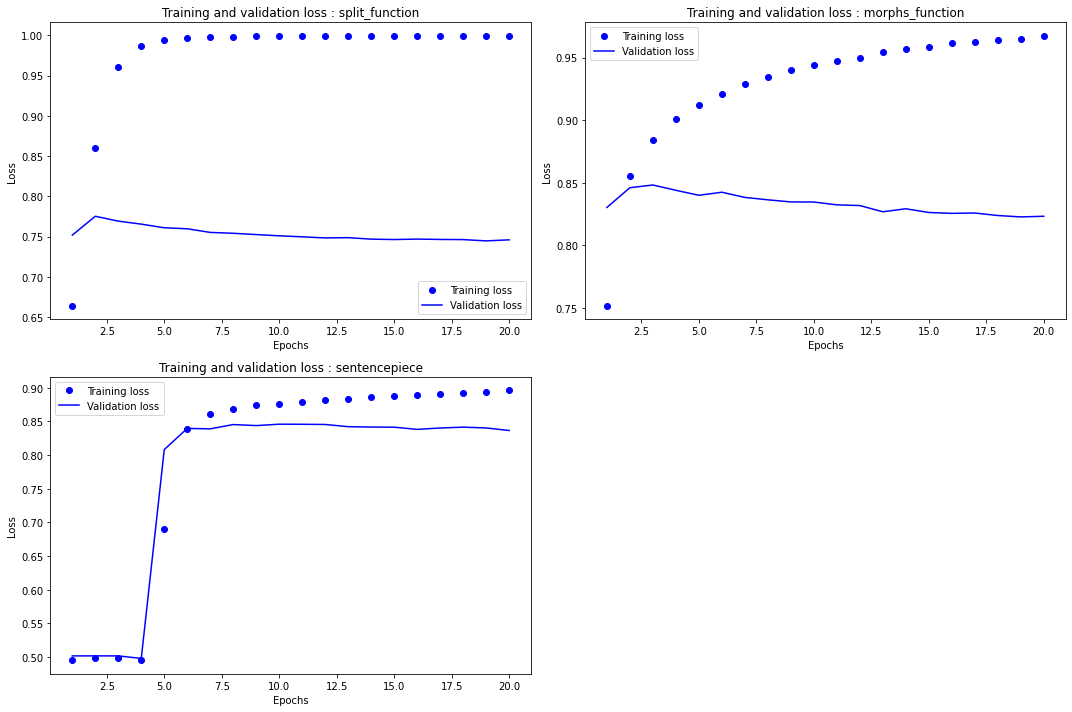

In [123]:
import matplotlib.pyplot as plt

# "bo"는 "파란색 점"입니다
fig =plt.figure(figsize = (15,10))

for i,h in enumerate(histories) :
    acc = h.history['accuracy']
    val_acc = h.history['val_accuracy']
    loss = h.history['loss']
    val_loss = h.history['val_loss']

    epochs = range(1, len(acc) + 1)
    ax = fig.add_subplot(2,2,i+1)
    plt.plot(epochs, acc, 'bo', label='Training loss')
    # b는 "파란 실선"입니다
    plt.plot(epochs, val_acc, 'b', label='Validation loss')
    plt.title(f'Training and validation loss : {modeldict[i+1][1]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

0.7458715438842773
0.8232717514038086
0.8365209102630615


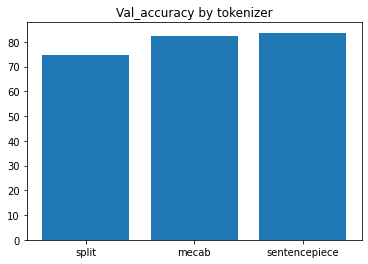

In [122]:
token_type = ['split','mecab','sentencepiece'] 
val_accuracy = []
for i,h in enumerate(histories) :
    val_accuracy.append(round(h.history['val_accuracy'][-1] * 100,3))
    print(h.history['val_accuracy'][-1])
    

plt.bar(token_type, val_accuracy)
plt.title('Val_accuracy by tokenizer')
plt.show()

### conclusion : 

Tokenizer 별로 RNN을 이용해서 감정 분석을 해봤습니다. 

결과를 봤을때 subword를 이용한 sentencepiece가 소소한 차이로 성능이 가장 높게 나타났고, 학습도 제일 안정적으로 진행이 되었습니다. 

학습의 결과를 설명하기에는 지금은 지식이 부족합니다. 추축하기로는 전처리를 더욱 깨끗하게 했을 경우에는 mecab이 더 우수하지 않았을까 생각이 들고, 단순 ㄱ감정분석이기 때문에 결과가 별로 차이가 없이 나온게 아닌가 싶기도 하다.